<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/ensemble%20/anomaly_detection_isolationforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.ensemble import IsolationForest

from unicodedata import normalize

#**Funciones**
---

In [ ]:
def normalize_word(word):
  """Normaliza palabras"""
  word = word.replace(' ', '_')
  find_guion = word.find('_')
  list_word = []
  if find_guion:
    list_word = [w for w in word.split('_') if w != '']
  else:
    list_word = word
  word = list(map(lambda x: x.lower(), list_word))
  word = [normalize('NFKD', c).encode('ASCII', 'ignore').decode() for c in word]
  word = "_".join(word)
  return word



def normalize_name_columns(columns):
  """Normaliza columnas"""
  columns = list(map(lambda x: normalize_word(x), columns))
  return columns

**Generar Data**
---

In [ ]:
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.5, center_box=(15, 15), random_state=12354)

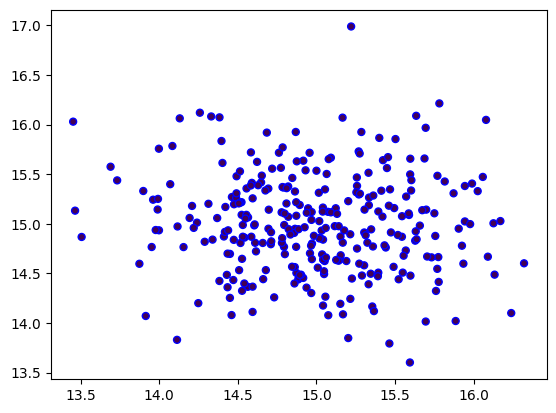

In [ ]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=_, s=25, edgecolor="b")
plt.show()

# **Model**
---

In [ ]:
model = IsolationForest(n_estimators=500, max_samples = 0.8,  contamination=0.3, random_state=12354, max_features = 1.0)
prediction = model.fit_predict(X)

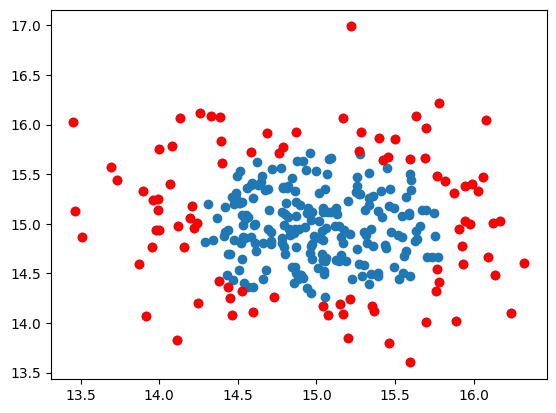

In [ ]:
index = np.where(prediction==-1)
outlier = X[index]
plt.scatter(X[:,0], X[:,1])
plt.scatter(outlier[:,0], outlier[:,1], color='red')
plt.show()

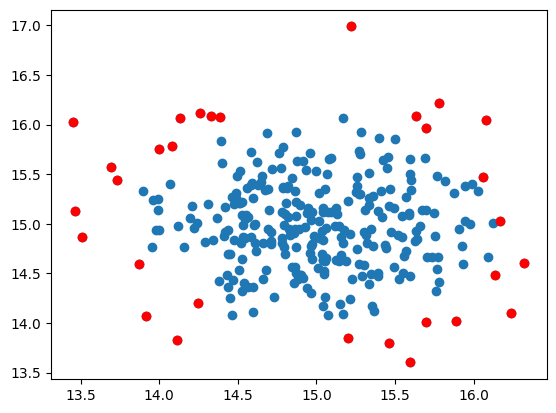

In [ ]:
model = IsolationForest(n_estimators=500, max_samples = 0.8,  contamination=0.1, random_state=12354, max_features = 1.0)
prediction = model.fit_predict(X)


index = np.where(prediction==-1)
outlier = X[index]
plt.scatter(X[:,0], X[:,1])
plt.scatter(outlier[:,0], outlier[:,1], color='red')
plt.show()

In [ ]:
# Atipicos varias columnas
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.5, center_box=(15, 15), random_state=12354, n_features=3)
model = IsolationForest(n_estimators=500, max_samples = 0.8,  contamination=0.1, random_state=12354, max_features = 1.0)
prediction = model.fit_predict(X)
index = np.where(prediction==-1)
outlier = X[index]
# outlier 
index #Valores que presentan comportamiento atipico.

(array([  6,  12,  17,  19,  23,  26,  74,  76,  92, 114, 119, 121, 153,
        159, 161, 182, 213, 230, 233, 236, 240, 247, 259, 260, 269, 271,
        277, 278, 292, 297]),)

In [ ]:
# Instancia
model.estimator_

ExtraTreeRegressor(max_depth=8, max_features=1, random_state=12354)

In [ ]:
# model.feature_names_in_

In [ ]:
# N params
model.get_params()

{'bootstrap': False,
 'contamination': 0.1,
 'max_features': 1.0,
 'max_samples': 0.8,
 'n_estimators': 500,
 'n_jobs': None,
 'random_state': 12354,
 'verbose': 0,
 'warm_start': False}

# **Real Data**
---

# **Diccionario de datos**
---

- Income: ingresos anuales clientes
- Kidhome: número de niños en el hogar del cliente
- Teenhome: número de adolecentes in el hogar
- Recency: número de días de la ultima compra
- MntWines: cantidad gastada en vinos en los últimos 2 años
- MntFruits: cantidad gastada en frutas en los últimos 2 años
- MntMeatProducts: cantidad gastada en carne en los últimos 2 años
- MntFishProducts: cantidad gastada en pescado en los últimos 2 años
- MntSweetProducts: cantidad gastada en dulces en los últimos 2 años
- MntGoldProds: cantidad gastada en productos de oro en los últimos 2 años
- NumDealsPurchases: número de compras realizadas con descuento
- NumWebPurchases: número de compras realizadas a través del sitio web
- NumCatalogPurchases: número de compras realizadas usando el catalogo
- NumStorePurchases: número de compras realizadas directamente en las tiendas
- NumWebVisitsMonth: número de visitas en la pagina web de la compañia en el ultimo mes.
- AcceptedCmp3: si el cliente aceptó la oferta 3. 1 si | 0 no
- AcceptedCmp4: si el cliente aceptó la oferta 4. 1 si | 0 no
- AcceptedCmp5: si el cliente aceptó la oferta 5. 1 si | 0 no
- AcceptedCmp1: si el cliente aceptó la oferta 1. 1 si | 0 no
- AcceptedCmp2: si el cliente aceptó la oferta 2. 1 si | 0 no
- Complain: si los clientes se quejaron en los últimos 2 años. 1 si | 0 no
- Z_CostContact: 
- Response: 
- Age: edad
- Customer_Days: Días del cliente
- arital_Divorced: divorciado
- marital_Married: Casado - Matrimonio
- marital_Single: soltero
- marital_Together: unión libre
- marital_Widow; viudo
- education_2n Cycle
- education_Basic: educación basica
- education_Graduation: educación graduación
- education_Master: tiene maestria
- education_PhD: tiene doctorado
- MntTotal
- MntRegularProds
- AcceptedCmpOverall

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/nailson/ifood-data-business-analyst-test/master/ifood_df.csv')
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
columns_new = normalize_name_columns(data.columns)

data.columns = columns_new

In [ ]:
data.columns

Index(['income', 'kidhome', 'teenhome', 'recency', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth',
       'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1',
       'acceptedcmp2', 'complain', 'z_costcontact', 'z_revenue', 'response',
       'age', 'customer_days', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_together', 'marital_widow',
       'education_2n_cycle', 'education_basic', 'education_graduation',
       'education_master', 'education_phd', 'mnttotal', 'mntregularprods',
       'acceptedcmpoverall'],
      dtype='object')

# **Selección de algunas variables**
---

In [ ]:
data_select = data[['income', 'mntwines', 'mntfruits',
       'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts',
       'mntgoldprods', 'numdealspurchases', 'numwebpurchases',
       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth']]

In [ ]:
data_select.dtypes

income                 float64
mntwines                 int64
mntfruits                int64
mntmeatproducts          int64
mntfishproducts          int64
mntsweetproducts         int64
mntgoldprods             int64
numdealspurchases        int64
numwebpurchases          int64
numcatalogpurchases      int64
numstorepurchases        int64
numwebvisitsmonth        int64
dtype: object

# **Model**
---

In [ ]:
model = IsolationForest(n_estimators=500, max_samples = 0.8,  contamination=0.1, random_state=12354, max_features = 1.0)
prediction = model.fit_predict(data_select.values)

# **Determinación de registros atipicos**
---

In [ ]:
data_select["outliers"] = prediction

<ipython-input-28-14aad8349b65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_select["outliers"] = prediction


In [ ]:
data_outliers = data_select[data_select['outliers'] == -1]

In [ ]:
data.describe()

,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,...,marital_together,marital_widow,education_2n_cycle,education_basic,education_graduation,education_master,education_phd,mnttotal,mntregularprods,acceptedcmpoverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [ ]:
data_outliers.describe()

,income,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,outliers
count,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.0
mean,69846.325792,650.072398,75.380090,402.262443,106.678733,77.176471,103.375566,2.565611,5.855204,5.855204,7.742081,4.588235,-1.0
std,22471.178313,419.410305,63.219318,284.271068,80.724452,65.091199,77.832683,3.246186,3.665172,3.425417,3.487835,3.718216,0.0
min,1730.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0
25%,61416.000000,279.000000,20.000000,170.000000,33.000000,18.000000,34.000000,1.000000,4.000000,3.000000,5.000000,2.000000,-1.0
50%,75127.000000,606.000000,55.000000,368.000000,94.000000,57.000000,86.000000,1.000000,5.000000,6.000000,8.000000,4.000000,-1.0
75%,83715.000000,984.000000,132.000000,597.000000,180.000000,137.000000,172.000000,3.000000,8.000000,8.000000,10.000000,7.000000,-1.0
max,113734.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,-1.0


In [ ]:
data_select[data_select['outliers'] == 1].describe()

,income,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,outliers
count,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.000000,1984.0
mean,49592.077117,267.856351,20.947581,138.917843,30.079133,21.553427,37.449597,2.290827,3.905242,2.287802,5.609879,5.420363,1.0
std,19485.559818,304.025195,31.916910,191.824057,45.048775,33.165521,43.209099,1.666494,2.541058,2.475362,3.142445,2.207060,0.0
min,7500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.0
25%,34300.500000,20.000000,1.000000,14.000000,2.000000,1.000000,8.000000,1.000000,2.000000,0.000000,3.000000,4.000000,1.0
50%,48911.000000,144.500000,7.000000,54.000000,10.000000,7.000000,21.000000,2.000000,3.000000,1.000000,4.000000,6.000000,1.0
75%,65468.750000,448.000000,26.000000,177.250000,37.000000,26.000000,48.000000,3.000000,6.000000,4.000000,8.000000,7.000000,1.0
max,96547.000000,1379.000000,184.000000,968.000000,258.000000,198.000000,248.000000,12.000000,11.000000,11.000000,13.000000,10.000000,1.0


# **Conclusiones**
---

- El grupo de valores atípicos tiene en la mayoría de sus columnas un promedio mayor al grupo de valores de no atípicos, a sabiendas de que los atípicos tiene menos registros.

- Similar que el promedio se evidencia en las variables max y de los cuantiles un número pronunciado en los atípicos.

- Si bien el modelo determina los atípicos en función a todas las variables establecidas, se requiere un análisis con el experto del negocio, para determinar si la anomalía se ajusta a la realidad, o al conjunto de datos.